# B.1 MEEP to model a 3D Cavity with PEC BC

In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cell = mp.Vector3(10, 10, 10)
geometry = [mp.Block(mp.Vector3(10, 10, 10), center=mp.Vector3(0, 0, 0), material=mp.Medium(epsilon=1))]
resolution = 10

In [3]:
sim = mp.Simulation(cell_size=cell, geometry=geometry, resolution=resolution)

from random import random
from random import seed
seed(1)
def field_func(p):
    rr = random() - 0.5
    return rr

sim.initialize_field(mp.Ex, field_func)
sim.initialize_field(mp.Ey, field_func)
sim.initialize_field(mp.Ez, field_func)

eps_data = sim.get_efield_z()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000469923 s
Working in 3D dimensions.
Computational cell is 10 x 10 x 10 with resolution 10
     block, center = (0,0,0)
          size (10,10,10)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 3.04299 s
-----------


In [4]:
Ex = []
Ey = []
Ez = []

def print_field(sim):
    fpx = sim.get_field_point(mp.Ex, mp.Vector3(0,0,0)).real
    Ex.append(fpx)
    fpy = sim.get_field_point(mp.Ey, mp.Vector3(0,0,0)).real
    Ey.append(fpy)
    fpz = sim.get_field_point(mp.Ez, mp.Vector3(0,0,0)).real
    Ez.append(fpz)
sim.run(mp.after_time(0, print_field), until=200)

FloatProgress(value=0.0, description='0% done ', max=200.0)

Meep progress: 38.550000000000004/200.0 = 19.3% done in 4.0s, 16.8s to go
on time step 772 (time=38.6), 0.00518695 s/step
Meep progress: 76.9/200.0 = 38.5% done in 8.0s, 12.8s to go
on time step 1539 (time=76.95), 0.00521931 s/step
Meep progress: 115.75/200.0 = 57.9% done in 12.0s, 8.7s to go
on time step 2316 (time=115.8), 0.00514928 s/step
Meep progress: 154.55/200.0 = 77.3% done in 16.0s, 4.7s to go
on time step 3092 (time=154.6), 0.00515757 s/step
Meep progress: 193.20000000000002/200.0 = 96.6% done in 20.0s, 0.7s to go
on time step 3865 (time=193.25), 0.00517789 s/step
run 0 finished at t = 200.0 (4000 timesteps)


In [5]:
Ex = np.array(Ex)
Ey = np.array(Ey)
Ez = np.array(Ez)

In [6]:
Ex_fft = np.fft.fft(Ex)
Ey_fft = np.fft.fft(Ey)
Ez_fft = np.fft.fft(Ez)

omega = np.fft.fftfreq(Ex.size, sim.meep_time()/Ex.size)

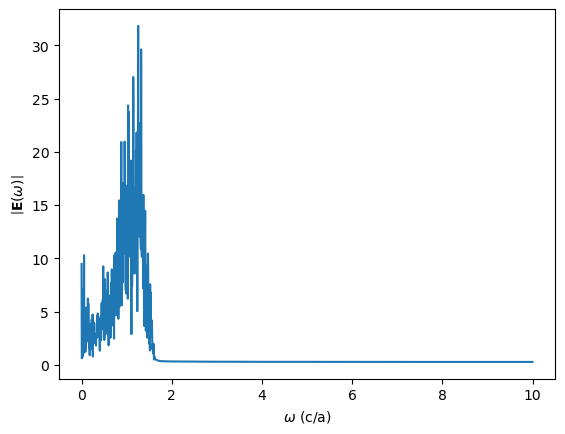

In [7]:
E_fft = np.sqrt(Ex_fft**2 + Ey_fft**2 + Ez_fft**2)

# plot only the positive frequencies
plt.plot(omega[:Ex.size//2], np.abs(E_fft[:Ex.size//2]))
plt.xlabel(r'$\omega$ (c/a)')
plt.ylabel(r'$\left| \mathbf{E}(\omega) \right|$')
plt.show()